In [1]:
import sys
sys.path.append('../')

In [2]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [3]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from '../vision_benchmarks.pyc'>

This was initially set to run 100 trials, but I accidentally interupted it around trial #80. After it runs a second time, we'll be plotting ~200 data points, which is more then ususal

In [ ]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        #result_feedback = x['result_feedback']
        compare_to_result_strength = x['compare_to_result_strength']
    )
    return {
        'loss': 
            abs(vals['AIT_to_PFC'] - 0.03) + abs(vals['PFC_to_PMC'] - 0.02) + abs(vals['PMC_to_MC'] - 0.025),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {'compare_to_result_strength': hp.uniform('compare_to_result_strength', 0, 1),
                     #'result_feedback': hp.uniform('result_feedback', 0, 1)
                    },
            algo = rand.suggest,
            max_evals = 100,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('compare_to_result_strength_data', 'w'))

In [6]:
print(best)

{'compare_to_result_strength': 0.1416302690767407}


How does this compare to the value that the multi-parameter hyperopt gave for this variable? It's pretty close - the initial value for the compare_to_result_strength parameter is 0.12966085928477078.

In [7]:
import pandas
import seaborn as sns
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

In [8]:
df = df[df._result_feedback == 0.4195086163487056]
df = df[df._AIT_r_transform == 0.8079719992231219]
df = df[df._V1_r_transform == 0.11090645719111913]
df = df[df._AIT_V1_strength == 0.06848695023305285]
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
0,0.022,-0.008,0.006,-0.001,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.020,0.005
8,0.022,-0.008,0.011,0.006,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.017,0.005
9,0.022,-0.008,0.005,0.000,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.013,0.005
11,0.022,-0.005,0.015,-0.003,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.014,0.005
12,0.022,-0.007,0.013,-0.001,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.014,0.005
16,0.022,-0.006,0.005,0.004,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.018,0.005
17,0.022,-0.008,0.011,0.008,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.017,0.005
19,0.022,0.047,0.036,0.012,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.071,0.005
20,0.022,-0.010,0.005,0.004,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.022,0.005
21,0.022,0.355,0.051,-0.013,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.192,0.005


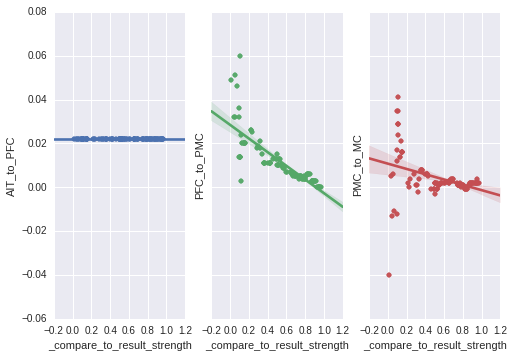

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_compare_to_result_strength'
sns.regplot(x, y = 'AIT_to_PFC', ax = ax1, data = df)
sns.regplot(x, y = 'PFC_to_PMC', ax = ax2, data = df)
sns.regplot(x, y = 'PMC_to_MC', ax = ax3, data = df)